In [29]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

Create data based on $\sqrt{x}$

In [30]:
np.random.seed(13)

In [31]:
X = np.arange(1, 60, 5)
y = [np.sqrt(xi) + np.random.normal(0,0.5) for xi in X]

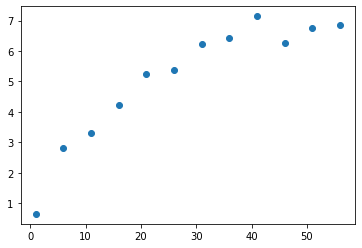

In [32]:
plt.scatter( X, y)

In [17]:
X = X.reshape(-1,1)
print(X.shape)

(12, 1)


$\color{blue}{\text{Pipeline advantages}}$ 
- Agregate funstions
- Streamline functions
- avoid repetition
- Gridsearch on tranformers and estimators at once

In [18]:
my_pipe = Pipeline([   # make_pipeline will name the features inside by itself while with Pipeline WE have to put names 
    ['my_poly_engineering', PolynomialFeatures(degree = 2)], 
    ['my_lasso', Lasso()]    # Regressor
])

In [19]:
my_pipe.fit(X,y) # we have an estimator so we need to put also -y-

Pipeline(steps=[('my_poly_engineering', PolynomialFeatures()),
                ['my_lasso', Lasso()]])

In [20]:
my_pipe.get_params()   # verbose : boolean and gives the degree of reporting of the function

{'memory': None,
 'steps': [('my_poly_engineering', PolynomialFeatures()),
  ['my_lasso', Lasso()]],
 'verbose': False,
 'my_poly_engineering': PolynomialFeatures(),
 'my_lasso': Lasso(),
 'my_poly_engineering__degree': 2,
 'my_poly_engineering__include_bias': True,
 'my_poly_engineering__interaction_only': False,
 'my_poly_engineering__order': 'C',
 'my_lasso__alpha': 1.0,
 'my_lasso__copy_X': True,
 'my_lasso__fit_intercept': True,
 'my_lasso__max_iter': 1000,
 'my_lasso__normalize': 'deprecated',
 'my_lasso__positive': False,
 'my_lasso__precompute': False,
 'my_lasso__random_state': None,
 'my_lasso__selection': 'cyclic',
 'my_lasso__tol': 0.0001,
 'my_lasso__warm_start': False}

In [21]:
parameter_grid = {
    'my_poly_engineering__degree' : [1,2,3,4,5], 
    'my_lasso__alpha' : [0.001, 0.01, 0.1 ,1, 10]  # strength of regularization
}

In [22]:
gridsearch = GridSearchCV(my_pipe,    # estimator is the pipeline
                          parameter_grid, 
                          scoring= 'neg_mean_squared_error',  
                          verbose = 4) 

In [23]:
gridsearch.fit(X,y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END my_lasso__alpha=0.001, my_poly_engineering__degree=1;, score=-5.018 total time=   0.0s
[CV 2/5] END my_lasso__alpha=0.001, my_poly_engineering__degree=1;, score=-0.759 total time=   0.0s
[CV 3/5] END my_lasso__alpha=0.001, my_poly_engineering__degree=1;, score=-0.811 total time=   0.0s
[CV 4/5] END my_lasso__alpha=0.001, my_poly_engineering__degree=1;, score=-0.491 total time=   0.0s
[CV 5/5] END my_lasso__alpha=0.001, my_poly_engineering__degree=1;, score=-2.955 total time=   0.0s
[CV 1/5] END my_lasso__alpha=0.001, my_poly_engineering__degree=2;, score=-0.274 total time=   0.0s
[CV 2/5] END my_lasso__alpha=0.001, my_poly_engineering__degree=2;, score=-0.051 total time=   0.0s
[CV 3/5] END my_lasso__alpha=0.001, my_poly_engineering__degree=2;, score=-0.008 total time=   0.0s
[CV 4/5] END my_lasso__alpha=0.001, my_poly_engineering__degree=2;, score=-0.264 total time=   0.0s
[CV 5/5] END my_lasso__alpha=0.001, my

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.409e-01, tolerance: 6.977e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.148e-01, tolerance: 4.263e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 4/5] END my_lasso__alpha=0.01, my_poly_engineering__degree=3;, score=-0.257 total time=   0.0s
[CV 5/5] END my_lasso__alpha=0.01, my_poly_engineering__degree=3;, score=-0.525 total time=   0.0s
[CV 1/5] END my_lasso__alpha=0.01, my_poly_engineering__degree=4;, score=-0.157 total time=   0.0s
[CV 2/5] END my_lasso__alpha=0.01, my_poly_engineering__degree=4;, score=-0.148 total time=   0.0s
[CV 3/5] END my_lasso__alpha=0.01, my_poly_engineering__degree=4;, score=-0.010 total time=   0.0s
[CV 4/5] END my_lasso__alpha=0.01, my_poly_engineering__degree=4;, score=-0.256 total time=   0.0s
[CV 5/5] END my_lasso__alpha=0.01, my_poly_engineering__degree=4;, score=-1.737 total time=   0.0s
[CV 1/5] END my_lasso__alpha=0.01, my_poly_engineering__degree=5;, score=-0.179 total time=   0.0s
[CV 2/5] END my_lasso__alpha=0.01, my_poly_engineering__degree=5;, score=-0.156 total time=   0.0s
[CV 3/5] END my_lasso__alpha=0.01, my_poly_engineering__degree=5;, score=-0.007 total time=   0.0s
[CV 4/5] E

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.752e-01, tolerance: 3.703e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.204e-01, tolerance: 3.664e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV 4/5] END my_lasso__alpha=0.1, my_poly_engineering__degree=5;, score=-0.248 total time=   0.0s
[CV 5/5] END my_lasso__alpha=0.1, my_poly_engineering__degree=5;, score=-5.280 total time=   0.0s
[CV 1/5] END my_lasso__alpha=1, my_poly_engineering__degree=1;, score=-5.824 total time=   0.0s
[CV 2/5] END my_lasso__alpha=1, my_poly_engineering__degree=1;, score=-0.714 total time=   0.0s
[CV 3/5] END my_lasso__alpha=1, my_poly_engineering__degree=1;, score=-0.840 total time=   0.0s
[CV 4/5] END my_lasso__alpha=1, my_poly_engineering__degree=1;, score=-0.496 total time=   0.0s
[CV 5/5] END my_lasso__alpha=1, my_poly_engineering__degree=1;, score=-2.476 total time=   0.0s
[CV 1/5] END my_lasso__alpha=1, my_poly_engineering__degree=2;, score=-8.882 total time=   0.0s
[CV 2/5] END my_lasso__alpha=1, my_poly_engineering__degree=2;, score=-0.073 total time=   0.0s
[CV 3/5] END my_lasso__alpha=1, my_poly_engineering__degree=2;, score=-0.097 total time=   0.0s
[CV 4/5] END my_lasso__alpha=1, my_p

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.419e+00, tolerance: 3.703e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.904e-01, tolerance: 3.664e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

GridSearchCV(estimator=Pipeline(steps=[('my_poly_engineering',
                                        PolynomialFeatures()),
                                       ['my_lasso', Lasso()]]),
             param_grid={'my_lasso__alpha': [0.001, 0.01, 0.1, 1, 10],
                         'my_poly_engineering__degree': [1, 2, 3, 4, 5]},
             scoring='neg_mean_squared_error', verbose=4)

In [24]:
gridsearch.best_params_

{'my_lasso__alpha': 0.001, 'my_poly_engineering__degree': 2}

In [26]:
gridsearch.best_estimator_.score(X,y)

0.9721891331248437

In [27]:
y_pred = gridsearch.best_estimator_.predict(X)

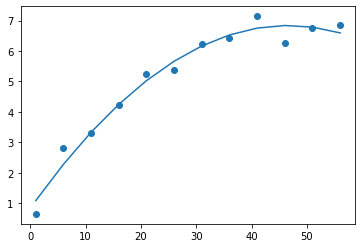

In [28]:
plt.scatter(X,y)
plt.plot(X,y_pred)